##Earthquake Pipeline

### Importing Libraries

In [0]:
!pip install cartopy

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-a1825852-083c-4808-9718-39c08c2dc287/bin/python -m pip install --upgrade pip' command.


In [0]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, concat_ws, to_timestamp,to_date,date_format,lit,concat,avg,max,min,radians,sqrt, sin, cos, atan2
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [0]:
## reading the dataframe

try:
    earthquake_df = spark.read.csv("/FileStore/tables/database-2.csv",header=True,inferSchema=True)
except Exception as e:
    print("Exception:",e)

In [0]:
earthquake_df = earthquake_df.select(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude'])

In [0]:
earthquake_df.display()

Date Time Latitude Longitude Type Depth Magnitude 01/02/1965 2024-02-29T13:44:18.000+0000 19.246 145.616 Earthquake 131.6 6.0 01/04/1965 2024-02-29T11:29:49.000+0000 1.863 127.352 Earthquake 80.0 5.8 01/05/1965 2024-02-29T18:05:58.000+0000 -20.579 -173.972 Earthquake 20.0 6.2 01/08/1965 2024-02-29T18:49:43.000+0000 -59.076 -23.557 Earthquake 15.0 5.8 01/09/1965 2024-02-29T13:32:50.000+0000 11.938 126.427 Earthquake 15.0 5.8 01/10/1965 2024-02-29T13:36:32.000+0000 -13.405 166.629 Earthquake 35.0 6.7 01/12/1965 2024-02-29T13:32:25.000+0000 27.357 87.867 Earthquake 20.0 5.9 01/15/1965 2024-02-29T23:17:42.000+0000 -13.309 166.212 Earthquake 35.0 6.0 01/16/1965 2024-02-29T11:32:37.000+0000 -56.452 -27.043 Earthquake 95.0 6.0 01/17/1965 2024-02-29T10:43:17.000+0000 -24.563 178.487 Earthquake 565.0 5.8 01/17/1965 2024-02-29T20:57:41.000+0000 -6.807 108.988 Earthquake 227.9 5.9 01/24/1965 2024-02-29T00:11:17.000+0000 -2.608 125.952 Earthquake 20.0 8.2 01/29/1965 2024-02-29T09:35:30.000+0000 54.636 161.703 Earthquake 55.0 5.5 02/01/1965 2024-02-29T05:27:06.000+0000 -18.697 -177.864 Earthquake 482.9 5.6 02/02/1965 2024-02-29T15:56:51.000+0000 37.523 73.251 Earthquake 15.0 6.0 02/04/1965 2024-02-29T03:25:00.000+0000 -51.84 139.741 Earthquake 10.0 6.1 02/04/1965 2024-02-29T05:01:22.000+0000 51.251 178.715 Earthquake 30.3 8.7 02/04/1965 2024-02-29T06:04:59.000+0000 51.639 175.055 Earthquake 30.0 6.0 02/04/1965 2024-02-29T06:37:06.000+0000 52.528 172.007 Earthquake 25.0 5.7 02/04/1965 2024-02-29T06:39:32.000+0000 51.626 175.746 Earthquake 25.0 5.8 02/04/1965 2024-02-29T07:11:23.000+0000 51.037 177.848 Earthquake 25.0 5.9 02/04/1965 2024-02-29T07:14:59.000+0000 51.73 173.975 Earthquake 20.0 5.9 02/04/1965 2024-02-29T07:23:12.000+0000 51.775 173.058 Earthquake 10.0 5.7 02/04/1965 2024-02-29T07:43:43.000+0000 52.611 172.588 Earthquake 24.0 5.7 02/04/1965 2024-02-29T08:06:17.000+0000 51.831 174.368 Earthquake 31.8 5.7 02/04/1965 2024-02-29T08:33:41.000+0000 51.948 173.969 Earthquake 20.0 5.6 02/04/1965 2024-02-29T08:40:44.000+0000 51.443 179.605 Earthquake 30.0 7.3 02/04/1965 2024-02-29T12:06:08.000+0000 52.773 171.974 Earthquake 30.0 6.5 02/04/1965 2024-02-29T12:50:59.000+0000 51.772 174.696 Earthquake 20.0 5.6 02/04/1965 2024-02-29T14:18:29.000+0000 52.975 171.091 Earthquake 25.0 6.4 02/04/1965 2024-02-29T15:51:25.000+0000 52.99 170.874 Earthquake 25.0 5.8 02/04/1965 2024-02-29T18:34:12.000+0000 51.536 175.045 Earthquake 25.0 5.8 02/04/1965 2024-02-29T19:44:04.000+0000 13.245 -44.922 Earthquake 10.0 5.8 02/04/1965 2024-02-29T22:30:03.000+0000 51.812 174.206 Earthquake 10.0 5.7 02/05/1965 2024-02-29T06:39:50.000+0000 51.762 174.841 Earthquake 25.0 5.7 02/05/1965 2024-02-29T09:32:11.000+0000 52.438 174.321 Earthquake 39.5 6.3 02/05/1965 2024-02-29T13:38:47.000+0000 51.946 173.84 Earthquake 30.0 5.7 02/05/1965 2024-02-29T20:47:12.000+0000 51.738 174.566 Earthquake 20.0 6.0 02/05/1965 2024-02-29T22:16:02.000+0000 51.487 176.558 Earthquake 30.4 5.6 02/06/1965 2024-02-29T01:40:32.000+0000 53.008 -162.008 Earthquake 17.8 6.4 02/06/1965 2024-02-29T04:02:54.000+0000 52.184 175.505 Earthquake 27.7 6.2 02/06/1965 2024-02-29T07:14:45.000+0000 52.076 172.918 Earthquake 30.1 5.6 02/06/1965 2024-02-29T12:22:28.000+0000 51.744 175.213 Earthquake 37.4 5.7 02/06/1965 2024-02-29T14:11:11.000+0000 52.057 174.116 Earthquake 17.5 5.7 02/06/1965 2024-02-29T16:50:29.000+0000 53.191 -161.859 Earthquake 22.5 6.3 02/06/1965 2024-02-29T18:10:30.000+0000 51.447 176.469 Earthquake 25.2 5.8 02/07/1965 2024-02-29T02:17:08.000+0000 51.258 173.393 Earthquake 17.7 5.7 02/07/1965 2024-02-29T04:11:22.000+0000 52.031 175.411 Earthquake 25.0 5.7 02/07/1965 2024-02-29T09:25:52.000+0000 51.294 179.092 Earthquake 25.0 5.8 02/08/1965 2024-02-29T15:46:52.000+0000 55.223 165.426 Earthquake 32.5 5.9 02/09/1965 2024-02-29T05:42:05.000+0000 -18.718 169.386 Earthquake 200.0 5.6 02/09/1965 2024-02-29T17:37:17.000+0000 52.815 171.904 Earthquake 30.0 6.0 02/12/1965 2024-02-29T00:55:10.000+0000

In [0]:
earthquake_df.select("Type").distinct().show()

+-----------------+
|             Type|
+-----------------+
|        Explosion|
|       Rock Burst|
|Nuclear Explosion|
|       Earthquake|
+-----------------+



### Tasks / Transformations

### Date and Time columns into a timestamp

In [0]:
# Convert the Date and Time columns into a timestamp column named Timestamp.
earthquake_df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Type: string (nullable = true)
 |-- Depth: double (nullable = true)
 |-- Magnitude: double (nullable = true)



In [0]:

try:
    # convert the date column type to date
    earthquake_df_date_converted = earthquake_df.withColumn("Date",to_date("Date","dd/MM/yyyy"))

    # format the date column as per need
    earthquake_df_date_converted = earthquake_df_date_converted.withColumn("Date",date_format("Date","dd-MM-yyyy"))

except exception as e:
    print("Exception:",e)

In [0]:

try:
    # format the time column as per need
    earthquake_df_time_converted = earthquake_df_date_converted.withColumn("Time",date_format("Time","HH:mm:ss"))

    # concat the date and time to form timestamp column
    earthquake_timestamp_converted = earthquake_df_time_converted.withColumn('Timestamp', concat(col('Date'),lit(" "), col('Time')))

except exception as e:
    print("Exception:",e)

In [0]:
try:
    # convert the type of timestamp column from string to timestamp
    earthquake_time_df = earthquake_timestamp_converted.withColumn("Timestamp",to_timestamp('Timestamp',"dd-MM-yyyy HH:mm:ss"))

except exception as e:
    print("Exception:",e)

### Filter the dataset where magnitude greater than 5.0

In [0]:
try:
    # Filter the dataset to include only earthquakes with a magnitude greater than 5.0
    earthquake_filtered = earthquake_time_df.filter('magnitude>5.0')

except exception as e:
    print("Exception:",e)

### Calculating the average depth and magnitude of earthquakes for each earthquake type

In [0]:
try:
    # Calculate the average depth and magnitude of earthquakes for each earthquake type.

    earthquake_grouped_df = earthquake_filtered.groupBy("Type").agg(avg("Depth").alias("avg_depth"), avg("Magnitude").alias("avg_magnitude"))

except exception as e:
    print("Exception:",e)

In [0]:
earthquake_grouped_df.display()

Type avg_depth avg_magnitude Explosion 0.0 5.85 Rock Burst 1.0 6.2 Nuclear Explosion 0.3 5.850685714285718 Earthquake 71.31391348140497 5.882762568870756

In [0]:
# If the magnitude is greater than 6 means High
# If the magnitude is greater than 5-5.9 means Moderate
# If the magnitude is lesser than 5 means Low

# Writing the UDF to categorize the earthquakes into levels (e.g., Low, Moderate, High) based on their magnitudes.

def categorize(magnitude):
    if magnitude>=6:
        return "High"
    elif magnitude>=5 and magnitude<=5.9:
        return "Moderate"
    else:
        return "Low"


In [0]:
try:
    # calling the function inside the UDF
    categorizeUDF = udf(lambda z:categorize(z),StringType()) 
    earthquake_cat = earthquake_time_df.withColumn("Earthquake_level", categorizeUDF(col("Magnitude")))

except exception as e:
    print("Exception:",e)

In [0]:
earthquake_cat.display()

Date Time Latitude Longitude Type Depth Magnitude Timestamp Earthquake_level 01-02-1965 13:44:18 19.246 145.616 Earthquake 131.6 6.0 1965-02-01T13:44:18.000+0000 High 01-04-1965 11:29:49 1.863 127.352 Earthquake 80.0 5.8 1965-04-01T11:29:49.000+0000 Moderate 01-05-1965 18:05:58 -20.579 -173.972 Earthquake 20.0 6.2 1965-05-01T18:05:58.000+0000 High 01-08-1965 18:49:43 -59.076 -23.557 Earthquake 15.0 5.8 1965-08-01T18:49:43.000+0000 Moderate 01-09-1965 13:32:50 11.938 126.427 Earthquake 15.0 5.8 1965-09-01T13:32:50.000+0000 Moderate 01-10-1965 13:36:32 -13.405 166.629 Earthquake 35.0 6.7 1965-10-01T13:36:32.000+0000 High 01-12-1965 13:32:25 27.357 87.867 Earthquake 20.0 5.9 1965-12-01T13:32:25.000+0000 Moderate null 23:17:42 -13.309 166.212 Earthquake 35.0 6.0 null High null 11:32:37 -56.452 -27.043 Earthquake 95.0 6.0 null High null 10:43:17 -24.563 178.487 Earthquake 565.0 5.8 null Moderate null 20:57:41 -6.807 108.988 Earthquake 227.9 5.9 null Moderate null 00:11:17 -2.608 125.952 Earthquake 20.0 8.2 null High null 09:35:30 54.636 161.703 Earthquake 55.0 5.5 null Moderate 02-01-1965 05:27:06 -18.697 -177.864 Earthquake 482.9 5.6 1965-01-02T05:27:06.000+0000 Moderate 02-02-1965 15:56:51 37.523 73.251 Earthquake 15.0 6.0 1965-02-02T15:56:51.000+0000 High 02-04-1965 03:25:00 -51.84 139.741 Earthquake 10.0 6.1 1965-04-02T03:25:00.000+0000 High 02-04-1965 05:01:22 51.251 178.715 Earthquake 30.3 8.7 1965-04-02T05:01:22.000+0000 High 02-04-1965 06:04:59 51.639 175.055 Earthquake 30.0 6.0 1965-04-02T06:04:59.000+0000 High 02-04-1965 06:37:06 52.528 172.007 Earthquake 25.0 5.7 1965-04-02T06:37:06.000+0000 Moderate 02-04-1965 06:39:32 51.626 175.746 Earthquake 25.0 5.8 1965-04-02T06:39:32.000+0000 Moderate 02-04-1965 07:11:23 51.037 177.848 Earthquake 25.0 5.9 1965-04-02T07:11:23.000+0000 Moderate 02-04-1965 07:14:59 51.73 173.975 Earthquake 20.0 5.9 1965-04-02T07:14:59.000+0000 Moderate 02-04-1965 07:23:12 51.775 173.058 Earthquake 10.0 5.7 1965-04-02T07:23:12.000+0000 Moderate 02-04-1965 07:43:43 52.611 172.588 Earthquake 24.0 5.7 1965-04-02T07:43:43.000+0000 Moderate 02-04-1965 08:06:17 51.831 174.368 Earthquake 31.8 5.7 1965-04-02T08:06:17.000+0000 Moderate 02-04-1965 08:33:41 51.948 173.969 Earthquake 20.0 5.6 1965-04-02T08:33:41.000+0000 Moderate 02-04-1965 08:40:44 51.443 179.605 Earthquake 30.0 7.3 1965-04-02T08:40:44.000+0000 High 02-04-1965 12:06:08 52.773 171.974 Earthquake 30.0 6.5 1965-04-02T12:06:08.000+0000 High 02-04-1965 12:50:59 51.772 174.696 Earthquake 20.0 5.6 1965-04-02T12:50:59.000+0000 Moderate 02-04-1965 14:18:29 52.975 171.091 Earthquake 25.0 6.4 1965-04-02T14:18:29.000+0000 High 02-04-1965 15:51:25 52.99 170.874 Earthquake 25.0 5.8 1965-04-02T15:51:25.000+0000 Moderate 02-04-1965 18:34:12 51.536 175.045 Earthquake 25.0 5.8 1965-04-02T18:34:12.000+0000 Moderate 02-04-1965 19:44:04 13.245 -44.922 Earthquake 10.0 5.8 1965-04-02T19:44:04.000+0000 Moderate 02-04-1965 22:30:03 51.812 174.206 Earthquake 10.0 5.7 1965-04-02T22:30:03.000+0000 Moderate 02-05-1965 06:39:50 51.762 174.841 Earthquake 25.0 5.7 1965-05-02T06:39:50.000+0000 Moderate 02-05-1965 09:32:11 52.438 174.321 Earthquake 39.5 6.3 1965-05-02T09:32:11.000+0000 High 02-05-1965 13:38:47 51.946 173.84 Earthquake 30.0 5.7 1965-05-02T13:38:47.000+0000 Moderate 02-05-1965 20:47:12 51.738 174.566 Earthquake 20.0 6.0 1965-05-02T20:47:12.000+0000 High 02-05-1965 22:16:02 51.487 176.558 Earthquake 30.4 5.6 1965-05-02T22:16:02.000+0000 Moderate 02-06-1965 01:40:32 53.008 -162.008 Earthquake 17.8 6.4 1965-06-02T01:40:32.000+0000 High 02-06-1965 04:02:54 52.184 175.505 Earthquake 27.7 6.2 1965-06-02T04:02:54.000+0000 High 02-06-1965 07:14:45 52.076 172.918 Earthquake 30.1 5.6 1965-06-02T07:14:45.000+0000 Moderate 02-06-1965 12:22:28 51.744 175.213 Earthquake 37.4 5.7 1965-06-02T12:22:28.000+0000 Moderate 02-06-1965 14:11:11 52.057 174.116 Earthquake 17.5 5.7 1965-06-02T14:11:11.000+0000 Moderate 02-06-1965 16:50:29 53.191 -161.859 Earthquake 22.5 6.3 1965-06-02T16:5

### calculating the distance of each earthquake from a reference location

In [0]:
# defining example reference location
ref_latitude = 0
ref_longitude = 0

try:
       # Convert latitude and longitude from degrees to radians
       df_radians = earthquake_cat.withColumn("lat1", radians(col("Latitude"))) \
              .withColumn("lon1", radians(col("Longitude"))) \
              .withColumn("lat2", radians(lit(ref_latitude))) \
              .withColumn("lon2", radians(lit(ref_longitude)))

       # Applying Haversine formula to calculate distance


       df_distance = df_radians.withColumn("delta_lat", col("lat2") - col("lat1")) \
              .withColumn("delta_lon", col("lon2") - col("lon1")) \
              .withColumn("a", sin(col("delta_lat") / 2) ** 2 + cos(col("lat1")) * cos(col("lat2")) * sin(col("delta_lon") / 2) ** 2) \
              .withColumn("c", 2 * atan2(sqrt(col("a")), sqrt(1 - col("a")))) \
              .withColumn("distance", 6371 * col("c"))  # Earth radius in kilometers

except exception as e:
    print("Exception:",e)

### Visualize the geographical distribution of earthquakes on a world map

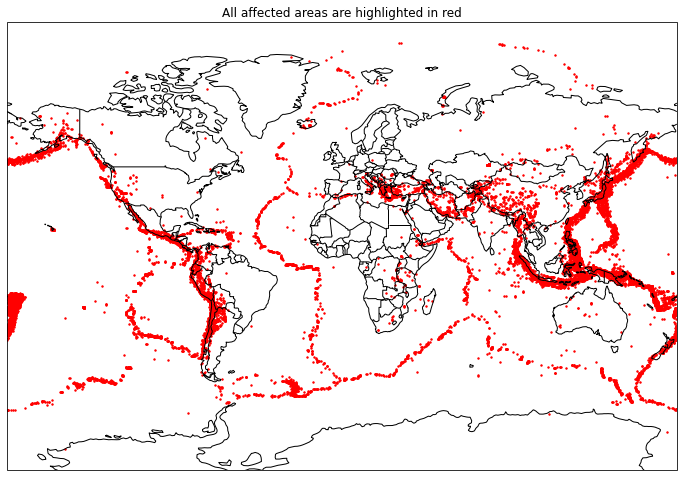

In [0]:
try:
    # Assuming `data` is your DataFrame containing longitude and latitude columns
    longitudes = df_distance.select("Longitude").rdd.map(lambda row: row[0]).collect()
    latitudes = df_distance.select("Latitude").rdd.map(lambda row: row[0]).collect()
    plt.figure(figsize=(12, 10))


    # Define the map projection
    projection = ccrs.Miller()
    # Create a Cartopy map
    ax = plt.axes(projection=projection)
    # Plot the data points
    ax.scatter(longitudes, latitudes, transform=ccrs.PlateCarree(), color='red', s=2)
    # Add coastlines and boundaries
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)

    # Show the plot
    plt.title("All affected areas are highlighted in red")
    plt.show()

except exception as e:
    print("Exception:",e)

In [0]:
df_final = df_distance.drop("lat1","lat2","lon1","lon2","delta_lat","delta_lon","a","b")

In [0]:
# Writing the final dataframe to Filestore

try:
    df_final.write.csv("/FileStore/tables/earthquake_transformed.csv", header=True, mode="overwrite")

except exception as e:
    print("Exception:",e)

In [0]:
# Download the csv with below syntax
displayHTML("""<a href='/FileStore/tables/earthquake_transformed.csv'>Final CSVFile </a>""")

Final CSVFile